In [28]:
from IPython.display import HTML
HTML('<img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/Youtube_2018.gif">')

# Analiza YouTube trendova

   Platforma YouTube, s kojom smo vjerojatno svi dobro poznati (pogotovo kada treba naučiti puno toga u malo vremena), vodi dnevnu evidenciju o videima na trending Pageu. Kako YouTube odlučuje koji videi će biti taj dan na trending Pageu? Sigurno postoji kompleksan algoritam na koji utječe mnogo faktora.

Mi ćemo u ovom eseju proučavati moguće korelacije između broja viewova, likeova, dislikeova i broja komentara na videima koji su bili na trending Pageu. Također, bavit ćemo se proučavanjem početcima jednih od najvećih neslužbenih *natjecanja* na YouTubeu, PewDiePie vs. T-Series. Dva velika kanala koja su se borila za prvo mjesto po broju pretplatnika, no više o ovoj zanimljivoj *borbi* nešto kasnije.

Trending Page se razlikuje od države do države. U nastavku ćemo učitati i analizirati podatke iz Velike Britanije (GB), Indije (IN) i Francuske (FR). Podaci su iz 2017. i 2018. godine.

### Velika Britanija

Ako sami želite izvrtjeti kod, podatke je potrebno preuzeti na [linku](https://www.kaggle.com/datasnaek/youtube-new) pritiskom na `Download (514 MB)`. Možete primijetiti da je datoteka jako velika. Unutra se nalazi puno podataka koji nam neće trebati. GitHub nažalost ne dopušta upload tako velikih datoteka, pa smo prisiljeni preuzimati ih s izvornih stranica.

Ono što će nama trebati su datoteke pod nazivom `GBvideos.csv`, `INvideos.csv` i `FRvideos.csv`. Spremite ih u mapu zajedno s ovim esejem kako biste mogli pokrenuti kod.

In [15]:
import pandas as pd
podaciGB = pd.read_csv('GBvideos.csv', encoding = 'utf-8')
podaciGB.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


Ovaj dataset je jako velik i s većinom kategorija ne možemo baratati niti ih analizirati. Ostavimo samo `trending_date`, `channel_title`, `category_id`, `views`, `likes`, `dislikes` i `comment_count`.

In [16]:
podaciGB.drop(['video_id', 'title', 'publish_time', 'tags','thumbnail_link', 'comments_disabled','ratings_disabled','video_error_or_removed','description'],axis=1,inplace=True)
podaciGB.head()

,trending_date,channel_title,category_id,views,likes,dislikes,comment_count
0,17.14.11,John Lewis,26,7224515,55681,10247,9479
1,17.14.11,Saturday Night Live,24,1053632,25561,2294,2757
2,17.14.11,EminemVEVO,10,17158579,787420,43420,125882
3,17.14.11,Salford City Football Club,17,27833,193,12,37
4,17.14.11,Cute Girl Videos,25,9815,30,2,30


Prilično je jasno što koji `Series` predstavlja osim možda `category_id`. To je [kategorija](https://gist.github.com/dgp/1b24bf2961521bd75d6c) u koju spada video. Neke od njih su *Music*, *Entertainment*, *Howto & Style* i slično. Njih ima ukupno $43$, no kao što možemo očekivati, neke su puno sklonije biti na Trending Pageu. Je li zastupljenost pojedine kategorije podjednaka u svakoj državi? To ćemo istražiti nešto kasnije.

Naredba `describe` nam neće dati mnogo korisnih informacija, ali postoji ozbiljniji modul koji Python nudi, `Pandas Profiling`. Njega je potrebno instalirati prije pokretanja sljedećeg koda. U terminal unesite sljedeću naredbu:

`pip install pandas-profiling`

Ako imate problema s instalacijom, pročitajte više na sljedećem [linku](https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3) ili pogledajte [video](https://www.youtube.com/watch?v=Ef169VELt5o).

Sama naredba se izvršava dosta dugo, no ona vraća vrlo detaljnu analizu kao što ćete vidjeti u nastavku. Predlažem da proučite koje rezultate dobijemo pozivanjem ove naredbe (vrlo korisno za brzu analizu podataka).

In [17]:
from pandas_profiling import ProfileReport
ProfileReport(podaciGB)

## Komentar na  analizu

#### Channel title

Dobivamo neka upozorenja na dataset. Jedan od warninga je `high cardinality` pojedinih kategorija. Analizirajmo `channel_title`. Bilo bi neobično kada bi na trending pageu uvijek bili videi istih kanala zato ima smisla što se javlja warning za taj stupac. Naravno, ne bismo mogli donijeti nikakav korisni zaključak da smo imali previše različitih kanala (ili nikakva ponavljanja uopće).

Ako pritisnemo na `Toggle details` (desni kut ispod svakog dijela), dobit ćemo puno detaljniju analizu.

Ono što je zanimljivo je popis kanala koji su često na trending pageu. Prva mjesta zauzimaju Late Night i Talk Show emisije. Također, ako proučimo koje riječi su najzastupljenije u imenu kanala (uz riječ 'the'), to su 'with', 'late', 'show' i 'live'. One nas već navode da su najfrekventniji kanali na trending pageu Late Night emisije.

Vrijedi spomenuti da se riječ 'jimmy' pojavljuje $415$ puta u imenima kanala.

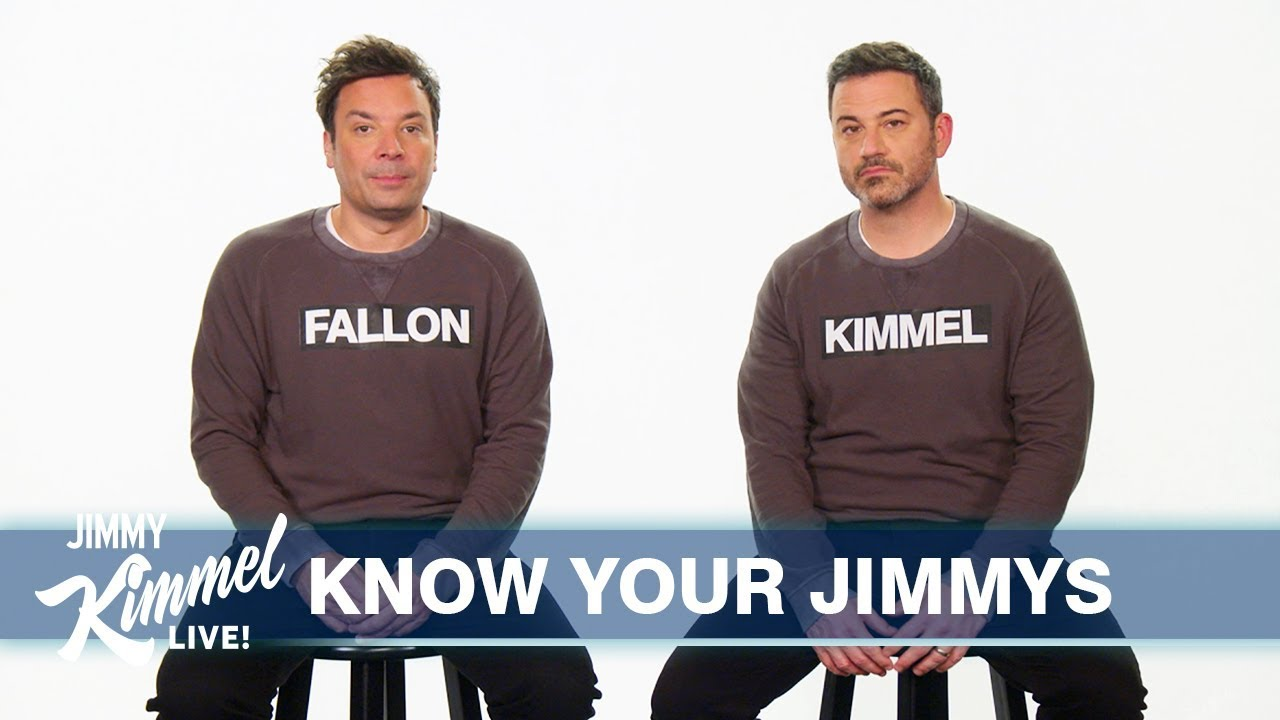

In [18]:
from IPython import display
display.Image("https://i.ytimg.com/vi/nyf7wNn5fw8/maxresdefault.jpg")

#### Category ID

Uočimo da je `category_id` diskretna varijabla koja može poprimiti vrijednosti od 1 do 43. Napišimo funkciju koja crta stupčasti dijagram za `category_id`.

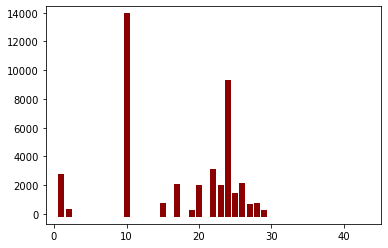

In [19]:
import matplotlib.pyplot as plt

def barplot(podaci):
    frekvencije_kategorija = []
    for i in range (0,43): frekvencije_kategorija.append(0) #inicijaliziramo listu u koju ćemo spremiti podatke
    for i in range (0,43): frekvencije_kategorija[i] = sum(podaci['category_id'] == i+1) #bilježimo frekvencije
    for i in range (0,43): plt.plot([i+1,i+1],[0,frekvencije_kategorija[i]],color='darkred',linewidth = 6) 
                                            #crtamo stupce kao deblje linije
barplot(podaciGB)

Prije nego krenemo dalje, definirajmo klasu koja će nam omogućavati printanje teksta u drugim [bojama](https://stackoverflow.com/questions/287871/how-to-print-colored-text-to-the-terminal).

In [20]:
import os

os.system("")

class style():
    RED = '\033[31m'
    GREEN = '\033[32m'
    YELLOW = '\033[33m'
    BLUE = '\033[34m'
    MAGENTA = '\033[35m'
    RESET = '\033[0m'

print(style.MAGENTA + f"Ovako će izgledati obojano.", style.RESET + f"Ovako vraćamo na zadanu boju.")

Ovako će izgledati obojano. Ovako vraćamo na zadanu boju.


Iz stupčastog dijagrama vidimo da je najzastupljenija kategorija na Trending pageu $10$, a ona predstavlja *Music*, odnosno glazbeni sadržaj. Do sada nismo spominjali glazbu kao popularnu kategoriju, no to je sasvim logično jer ne možemo očekivati da će samo par izvođača biti na Trending pageu (svaki ima svoj kanal).

Druga najpopularnija kategorija je $24$. Kao što je i prije bilo rečeno, i nekako očekivano, ona predstavlja 'Entertainment' u što spadaju Late Night i Talk Shows.

In [21]:
print(f"Od {len(podaciGB)} zabilježenih videa u Velikoj Britaniji, na Trending pageu je bilo", style.RED + f"{sum(podaciGB['category_id'] == 10)}", style.RESET + f"videa", style.RED + f"glazbenog sadržaja", style.RESET + f"\ni", style.GREEN + f"{sum(podaciGB['category_id'] == 24)}", style.RESET + f"videa vezanih uz", style.GREEN + f"entertainment", style.RESET + f".")

Od 38916 zabilježenih videa u Velikoj Britaniji, na Trending pageu je bilo 13754 videa glazbenog sadržaja 
i 9124 videa vezanih uz entertainment .


Nađimo aritmetičku sredinu broja viewova, likeova, i dislikeova za kategoriju koja nas zanima. Za to ćemo napraviti funkciju koja će primati `DataFrame`, `string` i `int` kao argumente. Za dani `DataFrame` tražimo retke (videe) koji spadaju u danu kategoriju i vraća aritmetičku sredinu za zadani `string` (u našem slučaju je to naziv za određeni `Series` iz `DataFrame`). Pogledajmo ispis u nastavku da bude jasnije što sama funkcija radi.

In [22]:
def ukupno(podaci,string,kategorija):
    suma = sum(podaci.loc[podaci['category_id'] == kategorija, string]) #sumiramo vrijednosti iz string (npr. views)
    broj_podataka = len(podaci.loc[podaci['category_id'] == kategorija, string]) #koliko ima podataka
    prosjek = suma/broj_podataka #racunamo prosjek
    return prosjek

print(f"U prosjeku, glazbeni sadržaj na Tranding pageu ima", style.BLUE + f"{round(ukupno(podaciGB,'views',10))}",style.RESET + f"viewova po videu, dok Entertainment videi imaju u prosjeku", style.GREEN + f"{round(ukupno(podaciGB,'views',24))}", style.RESET + "viewova.\n")
print(f"U prosjeku, glazbeni sadržaj na Tranding pageu ima", style.BLUE + f"{round(ukupno(podaciGB,'likes',10))}",style.RESET + f"likeova po videu, dok Entertainment videi imaju u prosjeku", style.GREEN + f"{round(ukupno(podaciGB,'likes',24))}", style.RESET + "likeova.\n")
print(f"U prosjeku, glazbeni sadržaj na Tranding pageu ima", style.BLUE + f"{round(ukupno(podaciGB,'dislikes',10))}",style.RESET + f"dislikeova po videu, dok Entertainment videi imaju u prosjeku", style.GREEN + f"{round(ukupno(podaciGB,'dislikes',24))}", style.RESET + "dislikeova.\n")
print(f"U prosjeku, glazbeni sadržaj na Tranding pageu ima", style.BLUE + f"{round(ukupno(podaciGB,'comment_count',10))}",style.RESET + f"komentara po videu, dok Entertainment videi imaju u prosjeku", style.GREEN + f"{round(ukupno(podaciGB,'comment_count',24))}", style.RESET + "komentara.\n")

U prosjeku, glazbeni sadržaj na Tranding pageu ima 12444443 viewova po videu, dok Entertainment videi imaju u prosjeku 3264608 viewova.

U prosjeku, glazbeni sadržaj na Tranding pageu ima 272139 likeova po videu, dok Entertainment videi imaju u prosjeku 81572 likeova.

U prosjeku, glazbeni sadržaj na Tranding pageu ima 11587 dislikeova po videu, dok Entertainment videi imaju u prosjeku 9657 dislikeova.

U prosjeku, glazbeni sadržaj na Tranding pageu ima 21304 komentara po videu, dok Entertainment videi imaju u prosjeku 12812 komentara.



Glazbeni sadržaj u prosjeku ima više viewova, likeova i komentara. Razlika u broju dislikeova između glazbenog sadržaja i Entertainmenta nije toliko značajna. Javlja se prirodno pitanje postoji li korelacija između ovih varijabli.

#### Correlations

U `Correlations` dijelu gornje analize, vidimo da najveći (Pearsonovi) koeficijenti korelacije su između `likes` i `comment_count`, `likes` i `views`, i između `dislikes` i `comment_count`.

Ne bi nas trebalo iznenaditi to što izgleda da `category_id` nije u jakoj korelaciji ni s jednom drugom kategorijom pošto on predstavlja *tip* videa.

Nacrtajmo takozvanu `scatter matrix`. Ona će nam dati, u našem slučaju, $4\times 4$ matricu čiji $(n,m)$-ti član sadrži koordinatni sustav na kojem su prikazani uređeni parovi iz danog `Dataframea` iz stupaca $n$ i $m$. Naredbi treba dosta vremena da vrati scatter matrix.

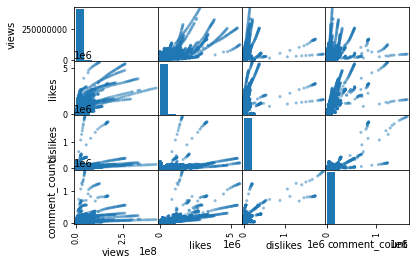

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(podaciGB[['views','likes','dislikes', 'comment_count']])
plt.show()

Izdvojimo jedan od gornjih grafova, na primjer, prikažimo uređene parove (`views`,`likes`).

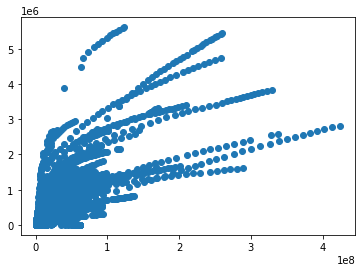

In [25]:
plt.plot(podaciGB['views'],podaciGB['likes'], 'o')
plt.show()

Vidimo iz gornjeg grafa (isto tako i iz ostalih grafova iz scatter matrice), da postoji neki uzorak. Možda bismo mogli upisati više logaritamskih funkcija koje bi opisivale gornju vezu, no samo jednu krivulju ne bismo mogli izdvojiti.

Postoji li neka pravilnija veza ako izdvojimo kategorije? Nacrtajmo uređene parove (`views`,`likes`), ali za kategoriju $10$ i kategoriju $24$ odvojeno. Prisjetimo se da $10$ predstavlja glazbeni sadržaj, dok $24$ predstavlja entertainment.

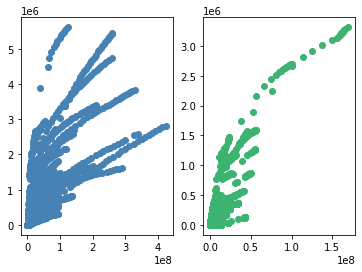

In [26]:
fig, (kat10, kat24) = plt.subplots(1,2)
kat10.plot(podaciGB.loc[podaciGB['category_id'] == 10, 'views'],podaciGB.loc[podaciGB['category_id'] == 10, 'likes'], 'o',color = "steelblue")
kat24.plot(podaciGB.loc[podaciGB['category_id'] == 24, 'views'],podaciGB.loc[podaciGB['category_id'] == 24, 'likes'], 'o', color = "mediumseagreen")
plt.show()

Gornji grafovi slijede isti uzorak kao i graf koji nije restringiran tako da ne možemo donijeti previše zaključaka na temelju njih.

## Analiza trendova u Indiji i Francuskoj

Ponovimo gornju analizu i za Indiju i Francusku. Nećemo raditi toliko detaljnu analizu jer je postupak analogan.

### Indija

Učitajmo podatke dobivene za Indiju.

In [27]:
podaciIN = pd.read_csv('INvideos.csv', encoding = 'utf-8')
podaciIN.drop(['video_id', 'title', 'publish_time', 'tags','thumbnail_link', 'comments_disabled','ratings_disabled','video_error_or_removed','description'],axis=1,inplace=True)
podaciIN.head()

,trending_date,channel_title,category_id,views,likes,dislikes,comment_count
0,17.14.11,Lokdhun Punjabi,1,1096327,33966,798,882
1,17.14.11,HJ NEWS,25,590101,735,904,0
2,17.14.11,TFPC,24,473988,2011,243,149
3,17.14.11,Eruma Saani,23,1242680,70353,1624,2684
4,17.14.11,Filmylooks,24,464015,492,293,66


Nacrtajmo scatter matrix i za podatke iz Indije.

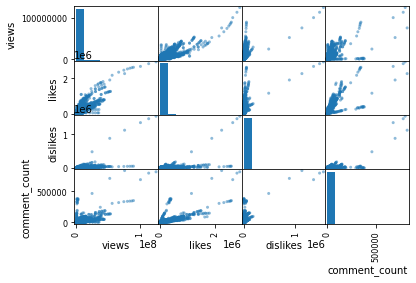

In [28]:
scatter_matrix(podaciIN[['views','likes','dislikes', 'comment_count']])
plt.show()

Uočimo da uređeni parovi u svim _kućicama_ prate neki uzorak, no ponovo ne možemo izdvojiti jednu krivulju koja bi opisivala podatke.

### Francuska

Ponovimo isto za Francusku.

In [29]:
podaciFR = pd.read_csv('FRvideos.csv', encoding = 'utf-8')
podaciFR.drop(['video_id', 'title', 'publish_time', 'tags','thumbnail_link', 'comments_disabled','ratings_disabled','video_error_or_removed','description'],axis=1,inplace=True)
podaciFR.head()

,trending_date,channel_title,category_id,views,likes,dislikes,comment_count
0,17.14.11,Le Raptor Dissident,24,212702,29282,1108,3817
1,17.14.11,Le Labo,24,432721,14053,576,1161
2,17.14.11,Daniil le Russe,23,482153,76203,477,9580
3,17.14.11,Joueur Du Grenier,20,925222,85016,550,4303
4,17.14.11,Aurelien Fontenoy,17,141695,8091,72,481


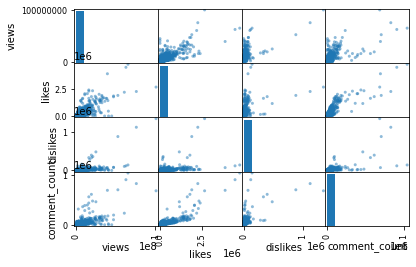

In [30]:
scatter_matrix(podaciFR[['views','likes','dislikes', 'comment_count']])
plt.show()

Za Francusku su podaci još raspršeniji, no izgleda da sadrži nešto manje outliera nego Indija i Velika Britanija.

Nacrtajmo grupirani stupčasti dijagram kategorija iz tri proučene države. Na $x$-osi nalaze se kategorije, a na $y$-osi relativne frekvencije.

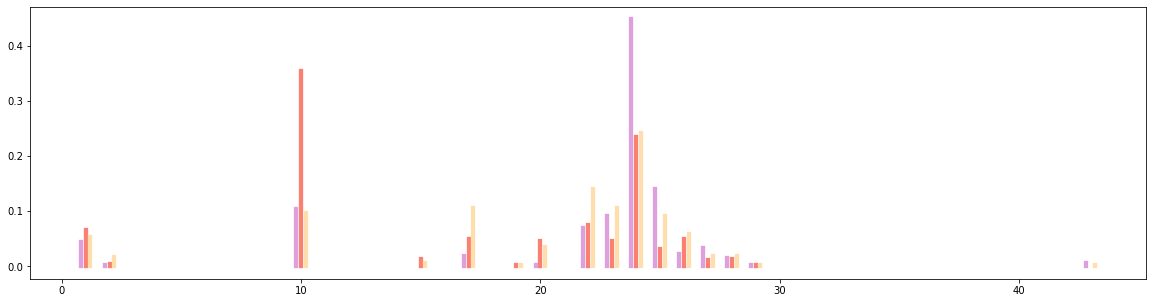

In [35]:
def rel_frek_kategorija(podaci):
    
    lista = [0]*43 #inicijaliziramo nul-listu
    for i in range (0,43): lista[i] = sum(podaci['category_id'] == i+1)/len(podaci) #tražimo relativne frekvencije
        
    return lista
    
relGB = rel_frek_kategorija(podaciGB)
relIN = rel_frek_kategorija(podaciIN)
relFR = rel_frek_kategorija(podaciFR)

plt.subplots(figsize=(20, 5))

for i in range(43):
    plt.plot([i+1,i+1],[0,relGB[i]],color='salmon',linewidth = 4.3)
    plt.plot([i+1-0.2,i+1-0.2],[0,relIN[i]],color='plum',linewidth = 4.3)
    plt.plot([i+1+0.2,i+1+0.2],[0,relFR[i]],color='navajowhite',linewidth = 4.3)

plt.show()

Većina kategorija na trending pageu spada u kategorije $1$, $2$, $10$ i u kategorije od $20$ do $30$. Neke kategorije nisu se pojavile ni jednom (u promatranom vremenu) na trending pageu, posebno kategorije od $30$ do $41$, nisu se pojavile ni u jednoj promatranoj državi.

### Sažetak

Vjeruje se da postoji _YouTube algoritam_ koji odlučuje koji videi završavaju na Trending pageu, no vidjeli smo da iz gornje analize nismo mogli zaključiti nešto više o njemu. Neki uzorci postoje, no zasigurno na to utječe kombinacija gornjih, a i dodatnih, faktora kojima nismo imali pristup.

YouTube je jedna od najvećih platformi na internetu i željeli bi zadržati svoje tajne, no, isto kao i sa svim velikim platformama, ljudi proučavaju uzorke i moguće veze. Više o samom algoritmu pročitajte [ovdje](https://www.shopify.com/blog/youtube-algorithm).

# PewDiePie vs. T-Series

Na početku smo spomenuli poznatu *borbu* između dva kanala, PewDiePie i T-Series. PewDiePie je imao titulu kanala s najviše pretplatnika gotovo pet godina! Godine 2018., T-Series se opasno počeo približavati po broju pretplatnika. T-Series je kanal kojeg vodi istoimena indijska diskografska kuća.

Podaci koje imamo su iz 2017. i 2018. godine, odnosno podaci uoči službenog početka borbe. Proučavat ćemo postoji li ikakva korelacija podataka pojedinog kanala.

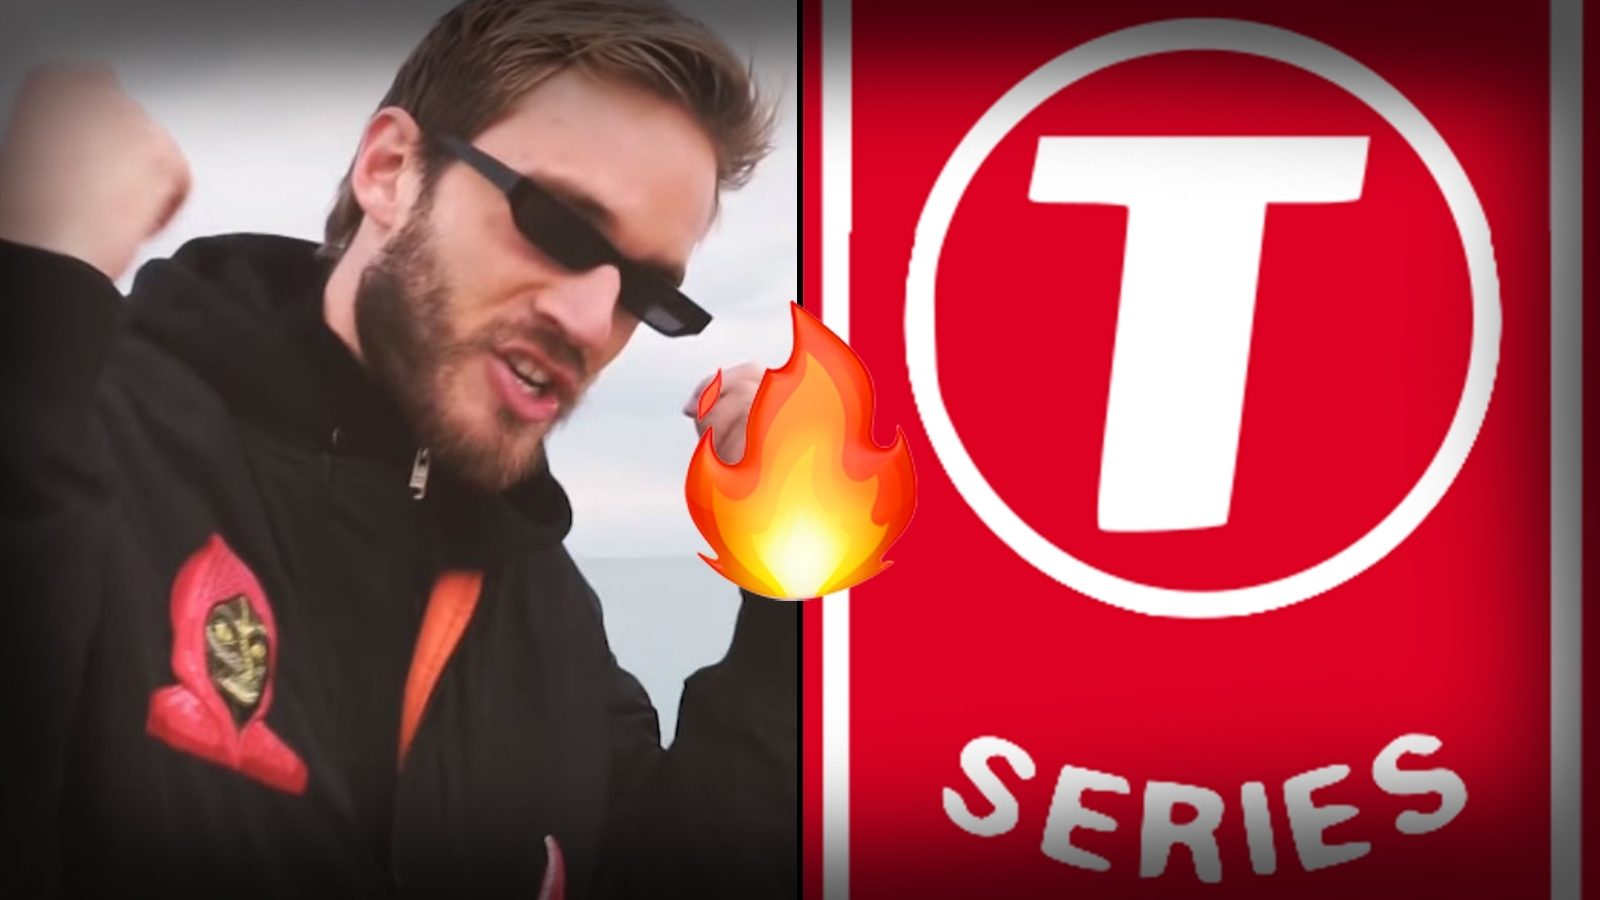

In [36]:
display.Image("https://socialbook.io/blog/content/images/wordpress/2019/03/PewDiePie-releases-T-Series-diss-track.jpg")

#### O samoj promociji borbe

Kada se T-Series počeo približavati PewDiePie-u po broju pretplatnika, krenula je sama promocija i poticanje na pretplaćivanje na PewDiePie-jev kanal. Zašto je toliko ljudi bilo na njegovoj strani? Jedan od važnih faktora bilo je to što je on bio jedna osoba koja je vodila cijeli kanal, dok je T-Series velika firma.

PewDiePie-jevi fanovi su promovirali "Subscribe to PewDiePie" na mnogo zanimljivih načina. Osim klasičnih objava na društvenim mrežama, hakirali su printere, web stranice, plaćali plakate na raznim mjestima, čak su se pojavljivali i na radio emisijama. Najznačajnija hakerska akcija je bila objava na Wall Street Journalu u kojoj je napisana lažna isprika PewDiePie-u. To je jedan od značajnijih trenutaka zato što su u prošlosti pisali puno članaka protiv njega.

Može se lako pretpostaviti da će takvo nešto, što je počelo kao šala, završiti u nekim ekstremima.

PewDiePie je objavio [_diss track_](https://www.youtube.com/watch?v=6Dh-RL__uN4) kojeg je T-Series optužio da promovira *anti Indija* kulturu. Potkrijepili su svoju tvrdnju porukama i objavama fanova koji su cijelu promociju shvatili preozbiljno. Unatoč molbama spomenutog YouTubera, takve stvari je nemoguće izbjeći kada je skupina njegovih pratitelja toliko velika.

Jedan od najtragičnijih događaja također je povezan ovom promocijom. Pucnjava u Christchurchu 2019. godine u Novom Zelandu o kojoj nećemo pisati, no više o tom događaju možete pročitati [ovdje](https://www.rollingstone.com/culture/culture-news/pewdie-pie-new-zealand-mosque-shooting-youtube-808633/). Ubojica je izrekao "Subscribe to PewDiePie" i tim događajem završio je cijeli pokret vezan za tu izjavu.

### Korelacija podataka

Provjerimo koliko puta su se spomenuti kanali pojavili na trending pageu u pojedinoj državi.

In [37]:
print(f"U Velikoj Britaniji, PewDiePie se pojavio {sum(podaciGB['channel_title']=='PewDiePie')} puta na trending pageu, a T-Series {sum(podaciGB['channel_title']=='T-Series')} puta.\n")
print(f"U Indiji, PewDiePie se pojavio {sum(podaciIN['channel_title']=='PewDiePie')} puta na trending pageu, a T-Series {sum(podaciIN['channel_title']=='T-Series')} puta.\n")
print(f"U Francuskoj, PewDiePie se pojavio {sum(podaciFR['channel_title']=='PewDiePie')} puta na trending pageu, a T-Series {sum(podaciFR['channel_title']=='T-Series')} puta.\n")

U Velikoj Britaniji, PewDiePie se pojavio 152 puta na trending pageu, a T-Series 0 puta.

U Indiji, PewDiePie se pojavio 85 puta na trending pageu, a T-Series 221 puta.

U Francuskoj, PewDiePie se pojavio 71 puta na trending pageu, a T-Series 7 puta.



Nacrtajmo uređene parove `(views, likes)` za kanal PewDiePie u Velikoj Britaniji.

#### Velika Britanija

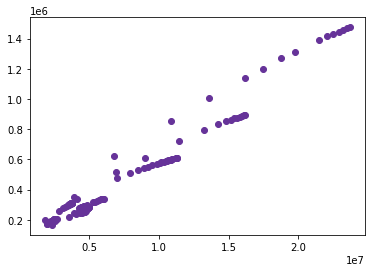

In [44]:
import numpy as np
podaciGB.loc[podaciGB['channel_title'] == 'PewDiePie','views']
xGB = podaciGB.loc[podaciGB['channel_title'] == 'PewDiePie','views']
yGB = podaciGB.loc[podaciGB['channel_title'] == 'PewDiePie','likes']
plt.plot(xGB, yGB, 'o', color= "rebeccapurple")
plt.show()

Uočimo da su točke raspoređene tako da bi mogle slijediti neki linearni model. Pronađimo taj model linearnom regresijom.

### Linearna regresija

Definirajmo funkciju koja će nam izbaciti koeficijente linearne regresije. Radimo je po [modelu](https://web.math.pmf.unizg.hr/nastava/statpr/files/linearna.pdf) s vježbi kolegija Statistički praktikum 1, no prvo implementirajmo funkciju koja će vraćati transponiranu matricu.

In [40]:
def transponiraj(A):
    
    broj_redaka = len(A[:,0])
    broj_stupaca = len(A[0,:])
    
    A_transponirana = np.zeros((broj_stupaca,broj_redaka))
    
    for i in range (broj_redaka):
        for j in range (broj_stupaca):
            A_transponirana[j][i] = A[i][j]
    
    return A_transponirana

Napišimo sada i funkciju koja vraća koeficijente linearnog modela, $\theta_1$ i $\theta_2$, takve da vrijedi:

$$y=\theta_1+\theta_2 x$$

za ulazne vrijednosti $x$ i $y$.

In [41]:
from numpy.linalg import inv #potrebno za invertiranje matrice

def linearna_regresija(podacix,podaciy):
    
    n = len(podacix) #broj redaka, broj stupaca = 2
    X = [[1 for i in range (2)] for j in range (n)] #svi članovi matrice postavljeni na 1
    
    for i in range (n): X[i][1] = podacix.tolist()[i]
        
    y = podaciy.array
    
    theta = inv(transponiraj(np.array(X)) @ X) @ transponiraj(np.array(X)) @ y
    
    print(theta)
    
print(linearna_regresija(xGB,yGB))

<PandasArray>
[25067.18406182765, 0.05970884529878348]
Length: 2, dtype: float64
None


Linearni model koji najbolje opisuje gornje podatke je dan kao:

$$y=25067.18406182765+0.05970884529878348x$$

Provjerimo je li metoda koju smo koristili dobra. Za to koristimo gotovu `NumPy` funkciju `np.polyfit(x,y,deg)`. Argumentom `deg` zadajemo koji stupanj polinoma tražimo. Kako se ovdje radi o linearnom modelu, zadajemo `deg = 1`.

y=0.05970884529878263x+25067.184061833235


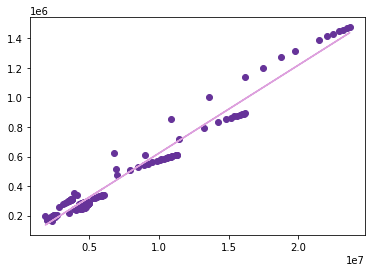

In [46]:
plt.plot(xGB, yGB, 'o',color = 'rebeccapurple')
kGB, lGB= np.polyfit(xGB, yGB, 1)
print(f"y={kGB}x+{lGB}")
plt.plot(xGB, kGB*xGB + lGB,color = 'plum')
plt.show()

##### Pearsonov koeficijent korelacije

Prisjetimo se da se Pearsonov koeficijent korelacije, $\rho$, između dvije neprekide varijable $X$ i $Y$ računa kao:

$$\rho= \frac{\text{cov}(X,Y)}{\sigma(X)\sigma(Y)}$$

Zbog grafa očekujemo veliku korelaciju viewsa i likeova, odnosno, očekujemo da će Pearsonov koeficijent biti blizu 1 i da će biti pozitivan jer se čini da rast jedne varijable uzrokuje rast druge.

In [84]:
from numpy import cov
from statistics import stdev

pearsonGB = (cov(xGB,yGB)/(stdev(xGB)*stdev(yGB)))[0,1]
pearsonGB

0.9834885641723664

Provjerimo je li dobiveni koeficijent dobar gotovom funkcijom.

In [61]:
from scipy.stats import pearsonr

provjera_pearson, _ = pearsonr(xGB,yGB)
provjera_pearson

0.9834885641723663

#### Francuska

Ponovimo isto za Francusku i kanal PewDiePie. Prvo je potrebno nacrtati uređene parove da vidimo mogu li se oni aproksimirati linearnim modelom.

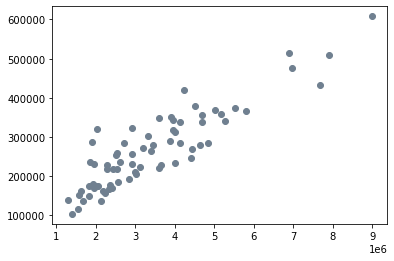

In [69]:
podaciFR.loc[podaciFR['channel_title'] == 'PewDiePie','views']
xFR = podaciFR.loc[podaciFR['channel_title'] == 'PewDiePie','views']
yFR = podaciFR.loc[podaciFR['channel_title'] == 'PewDiePie','likes']
plt.plot(xFR,yFR, 'o', color = "slategrey")
plt.show()

Iz gornjeg grafa vidimo da bi se podaci mogli dobro aproksimirati linearnim modelom.

y=0.05527778028625364x+77179.01765207501


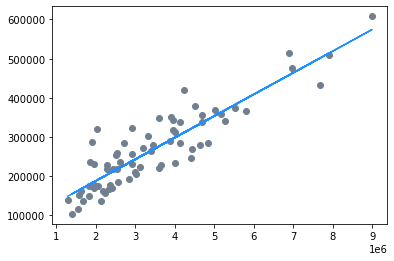

In [73]:
plt.plot(xFR, yFR, 'o', color = "slategrey")
kFR, lFR= np.polyfit(xFR, yFR, 1)
print(f"y={kFR}x+{lFR}")
plt.plot(xFR, kFR*xFR + lFR, color = "dodgerblue")
plt.show()

In [83]:
pearsonFR, _ = pearsonr(xFR,yFR)
pearsonFR

0.8968805449579749

Pearsonov koeficijent je nešto manji nego u Velikoj Britaniji, no svejedno postoji jaka koreliranost između viewsa i likeova.

#### Indija

Za Indiju ćemo napraviti isto, no ovdje ćemo i analizirati korelaciju između viewsa i likeova kanala T-Series. U prijašnje dvije države nismo imali dovoljno podataka da bi i njih analizirali.

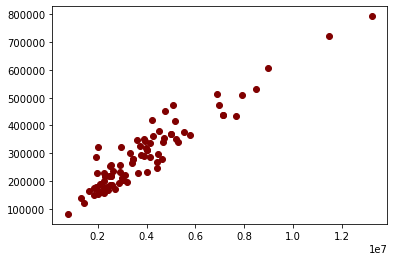

In [77]:
podaciIN.loc[podaciIN['channel_title'] == 'PewDiePie','views']
xIN = podaciIN.loc[podaciIN['channel_title'] == 'PewDiePie','views']
yIN = podaciIN.loc[podaciIN['channel_title'] == 'PewDiePie','likes']
plt.plot(xIN,yIN, 'o', color = "maroon")
plt.show()

y=0.05560929690504895x+78830.24427565074


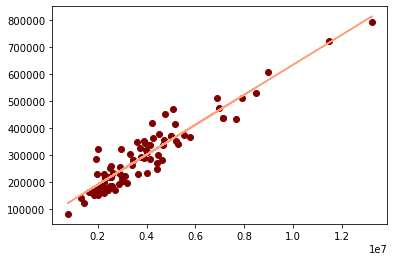

In [81]:
plt.plot(xIN, yIN, 'o', color = "maroon")
kIN, lIN= np.polyfit(xIN, yIN, 1)
print(f"y={kIN}x+{lIN}")
plt.plot(xIN, kIN*xIN + lIN, color = "lightsalmon")
plt.show()

In [82]:
pearsonIN, _ = pearsonr(xIN,yIN)
pearsonIN

0.9386800695042147

Vidimo da su podaci dobro opisani linearnim modelom, što potvrđuje i Pearsonov koeficijent korelacije koji je veći od $0.9$.

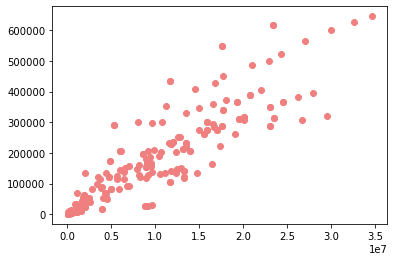

In [85]:
podaciIN.loc[podaciIN['channel_title'] == 'T-Series','views']
x = podaciIN.loc[podaciIN['channel_title'] == 'T-Series','views']
y = podaciIN.loc[podaciIN['channel_title'] == 'T-Series','likes']
plt.plot(x,y, 'o', color = "lightcoral")
plt.show()

y=0.017019241341126354x+11431.480884622879


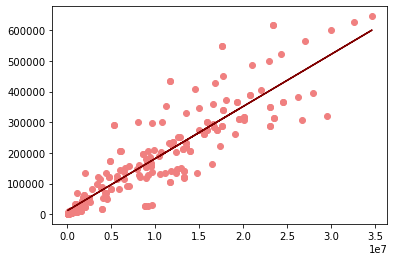

In [86]:
plt.plot(x, y, 'o', color = "lightcoral")
k, l= np.polyfit(x, y, 1)
print(f"y={k}x+{l}")
plt.plot(x, k*x + l, color = "maroon")
plt.show()

In [87]:
pearsonINT, _ = pearsonr(x,y)
pearsonINT

0.8900317757428527

Ponovo postoji linearni model koji opisuje vezu između viewsa i likeova kanala T-Series, no Pearsonov koeficijent je nešto manji nego za kanal PewDiePie.

## Sažetak

Tek kada smo jako smanjili skup podataka smo mogli donijeti neke korisnije zaključke. U našem slučaju je to bilo promatranje jednog kanala i promatranje veze između broj pregleda i likeova unutar tog kanala (isto smo mogli raditi s bilo koje dvije varijable).

Vidjeli smo da se brojem pregleda (unutar izdvojenih kanala) broj likeova također povećava i to, aproksimativno, po nekom linearnom modelu što smo potvrdili računanjem Pearsonovog koeficijenta korelacije koje je u svim slučajevima bio veći od $0.89$.

Borba između PewDiePie-a  i T-Series je završila 2019. godine pobjedom T-Series. U ovom trenutku T-Series ima $176$ milijuna pretplatnika, dok PewDiePie ima $109$ milijuna pretplatnika.

YouTube algoritam je jako složen i mnogi youtuberi pokušavaju otkriti uzorke i slijediti pravila kako bi što više bili na trending pageu, čak postoje i serijali posvećeni tom procesu. Algoritam se mijenja kroz vrijeme što je još jedna prepreka u pronalasku nekog pravila. U svakom slučaju, ako želite da vaš video bude na trending pageu morat ćete napraviti jako detaljnu i tešku analizu!

# Reference

https://www.kaggle.com/datasnaek/youtube-new

https://gist.github.com/dgp/1b24bf2961521bd75d6c

https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3

https://www.youtube.com/watch?v=Ef169VELt5o

https://stackoverflow.com/questions/287871/how-to-print-colored-text-to-the-terminal

https://web.math.pmf.unizg.hr/nastava/statpr/files/linearna.pdf

https://tech.hindustantimes.com/tech/news/pewdiepie-vs-t-series-looking-back-at-the-epic-battle-for-youtube-supremacy-story-q8J0VhkuIbrVLGeWfcqcHP.html

https://www.rollingstone.com/culture/culture-news/pewdie-pie-new-zealand-mosque-shooting-youtube-808633/

https://www.shopify.com/blog/youtube-algorithm